Importing dataset and libraries, then reducing dataset using stratified sampling based on target feature

In [1]:
import pandas as pd
import sanity_checks_methods
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from time import time
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Sanity checks

In [3]:
sanity_checks_methods.max_min_commonValue(df)

SEX
min value:0.0
max value: 1.0
max common value: 1.0

AGE
min value:-5.0
max value: 101.0
max common value: 60.0

HYPERTENSION
min value:0
max value: 1
max common value: 0

HEART_DISEASE
min value:0
max value: 1
max common value: 0

EVER_MARRIED
min value:0
max value: 1
max common value: 1

WORK_TYPE
min value:0
max value: 4
max common value: 4

RESIDENCE_TYPE
min value:0
max value: 1
max common value: 1

AVG_GLUCOSE_LEVEL
min value:55.12
max value: 271.74
max common value: 94.39

BMI
min value:14.1
max value: 78.0
max common value: 31.4

SMOKING_STATUS
min value:0
max value: 1
max common value: 0

STROKE
min value:0
max value: 1
max common value: 0



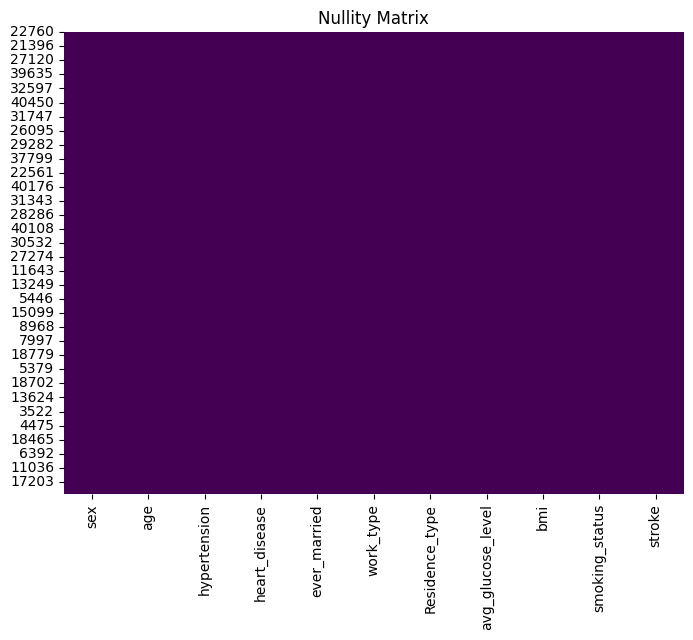

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Nullity Matrix')
plt.show()

Print duplicates and null values

In [2]:
sanity_checks_methods.print_null_duplicates_values(df)

Null Value Counts:
sex                  1
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Percentage of Null Values:
sex                  0.01
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  0.00
smoking_status       0.00
stroke               0.00
dtype: float64

Duplicate Counts:
0

Percentage of Duplicate Values:
0.0

Feature: sex
Null Count: 1
Null Percentage: 0.01%

Feature: age
Null Count: 0
Null Percentage: 0.00%

Feature: hypertension
Null Count: 0
Null Percentage: 0.00%

Feature: heart_disease
Null Count: 0
Null Percentage: 0.00%

Feature: ever_married
Null Count: 0
Null Percentage: 0.00%

Feature: work_type
Null Count: 0
Null Percen

Checking categorical features values

In [3]:
sanity_checks_methods.check_categorical_values(df)

Abnormal values found in feature 'sex':
       sex
35184  NaN


Abnormal values present


Checking negative values for features BMI, Age and glucose level

In [4]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

for feature in numerical_features:  
    sanity_checks_methods.check_negative_values(df, feature)

abnormal values present in age feature
       sex  age  hypertension  heart_disease  ever_married  work_type  \
13764  0.0 -1.0             0              0             1          4   
10175  1.0 -2.0             1              0             1          3   
11840  0.0 -2.0             1              0             1          3   
14940  0.0 -2.0             0              0             0          4   
9808   1.0 -3.0             0              1             1          3   
9936   1.0 -1.0             1              0             1          4   
13788  0.0 -1.0             1              0             1          4   
11716  1.0 -5.0             0              0             0          4   
10549  1.0 -4.0             1              0             1          4   
12639  0.0 -2.0             0              0             1          4   
11952  1.0 -3.0             1              0             0          3   
14844  0.0 -3.0             0              1             1          2   
10826  1.0 -

Checking consistency in age and ever_married feature

In [8]:
sanity_checks_methods.check_age_married_consistency(df)

number of incosistencies: 

423
Rows with age < 16 and ever_married == 1 have been dropped


consistency check between age and work_type feature

In [4]:
sanity_checks_methods.check_age_workType_consistency(df)

number of incosistencies: 

625


dropping null

In [16]:
df = df.dropna()
df = df[df['sex'] >= 0]

visualizing outliers using z-score

In [2]:
sanity_checks_methods.visualize_outliers(df)

EDA ON ORIGINAL DATASET

Categorical features frequencies

In [ ]:
categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def plot_categorical_bar_distribution():
    categorical_df = df[categorical_features]
    for column in categorical_features:
        sns.catplot(x=column, kind="count", data=categorical_df, height=6, aspect=1)
    plt.figure(figsize=(8, 8))
    stroke_counts = df['stroke'].value_counts()
    labels = stroke_counts.index
    sizes = stroke_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.show()
        
                
plot_categorical_bar_distribution()

Numerical features distribution

In [ ]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

def plot_numerical_features():
    numerical_df = df[numerical_features]
    fig, axs = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(15, 6*len(numerical_features)))
    
    for i, column in enumerate(numerical_features):
        sns.histplot(data=numerical_df, x=column, kde=True, ax=axs[i][0])

        sns.boxplot(data=numerical_df, x=column, ax=axs[i][1])
        
        axs[i][0].set_title(f'{column} Distribution')
        axs[i][1].set_title(f'{column} Boxplot')
        
    plt.tight_layout()
    plt.show()

plot_numerical_features()


Correlation matrix

In [ ]:
sns.set(rc = {'figure.figsize':(11,9)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')


plt.figure(figsize=(10, 6))
df_corr_with_stroke = df.corrwith(df['stroke']).drop('stroke')
df_corr_with_stroke.plot(kind='bar', grid=True, title="Correlation with Stroke", color="blue")
plt.show()

Correlation and distribution plots between dataset numerical features and target feature

In [ ]:
def print_plots():
    numerical_features = ['age', 'avg_glucose_level', 'bmi']
    for column in numerical_features:
        print_box_plot(column)
        print_strip_plot(column)
        print_line_plot(column)
        print_violin_plot(column)
        
    
def print_strip_plot(column):
    plt.figure(figsize=(8, 6))
    sns.stripplot(data=df, x='stroke', y=column)
    plt.title('swarm Plot of Stroke by ' + column)
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
def print_box_plot(column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="stroke", y=column)
    plt.title(f'Boxplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
def print_line_plot(column):
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=df, x='stroke', y=column)
    plt.title(f'Lineplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
    
def print_violin_plot(column):
    plt.figure(figsize=(8,6))
    sns.violinplot(data=df, x="stroke", y=column)
    plt.title(f'Violinplot of {column} by Stroke')
    plt.xlabel('1: Stroke, 0: No Stroke')
    plt.ylabel(column)
    plt.show()
    
print_plots()

comparison between categorical features and target

In [ ]:

categorical_features = ['sex', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

def print_stacked_barchart(column):
    grouped = df.groupby([column, 'stroke']).size().unstack()
    grouped.plot(kind='bar', stacked=True)
    plt.title(f'Stroke Distribution by {column} ')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
    plt.show()
    
def print_barchart(column):
    plt.figure(figsize=(6, 6))
    sns.countplot(x='stroke', hue=column, data=df)
    plt.title(f'Stroke Distribution by {column}')
    plt.xlabel('Stroke')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.show()
    
def print_piechart(column):
    plt.figure(figsize=(6, 6))
    sns.pieplot(x=column, hue='stroke', data=df)
    plt.title(f'Stroke Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
    plt.show()
    
def print_plots():
    for column in categorical_features:
        print_stacked_barchart(column)
        print_barchart(column)
        ##print_piechart(column)

print_plots()

DecisionTree

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Creazione del classificatore dell'albero decisionale
tree_classifier = DecisionTreeClassifier(random_state=42)

# Definizione della griglia degli iperparametri
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': np.arange(2, 51, 2),
    'min_samples_leaf': np.arange(1, 9),
    'max_depth': [None, 5, 10, 15, 20]
}

# Utilizzo di RandomizedSearchCV per una ricerca efficiente degli iperparametri
random_search = RandomizedSearchCV(tree_classifier, param_distributions=param_dist, n_iter=100, cv=10, scoring='roc_auc', random_state=42)

# Misurazione del tempo di inizio per la ricerca degli iperparametri
start_time_hyperparameter_search = time()
random_search.fit(X_train, y_train)
end_time_hyperparameter_search = time()
hyperparameter_search_time = end_time_hyperparameter_search - start_time_hyperparameter_search

# Ottenimento dei migliori parametri e del miglior stimatore
best_params = random_search.best_params_
best_tree_classifier = random_search.best_estimator_

# Stampa dei migliori parametri e del loro ROC AUC score sul set di addestramento
y_train_pred_prob = best_tree_classifier.predict_proba(X_train)[:, 1]
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)

# Addestramento del modello sull'intero set di addestramento e misurazione del tempo di addestramento
start_time_training = time()
best_tree_classifier.fit(X_train, y_train)
end_time_training = time()
dt_training_time = end_time_training - start_time_training

# Previsioni sui set di addestramento e test
y_train_pred = best_tree_classifier.predict(X_train)
y_test_pred = best_tree_classifier.predict(X_test)

# Stampa delle prestazioni sul set di addestramento
print("\nPrestazioni sul Set di Addestramento:")
print(classification_report(y_train, y_train_pred))

# Stampa delle prestazioni sul set di test
print("\nPrestazioni sul Set di Test:")
print(classification_report(y_test, y_test_pred))

# Stampa dei migliori parametri e del tempo impiegato per la ricerca degli iperparametri e l'addestramento
print("\nMigliori Parametri:", best_params)
print("Tempo impiegato per la Ricerca degli Iperparametri:", hyperparameter_search_time, "secondi")
print("Tempo impiegato per l'Addestramento:", dt_training_time, "secondi")


Prestazioni sul Set di Addestramento:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3463
           1       0.95      1.00      0.97      3537

    accuracy                           0.97      7000
   macro avg       0.98      0.97      0.97      7000
weighted avg       0.98      0.97      0.97      7000


Prestazioni sul Set di Test:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1537
           1       0.90      1.00      0.95      1463

    accuracy                           0.94      3000
   macro avg       0.95      0.95      0.94      3000
weighted avg       0.95      0.94      0.94      3000


Migliori Parametri: {'min_samples_split': 30, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}
Tempo impiegato per la Ricerca degli Iperparametri: 11.424027442932129 secondi
Tempo impiegato per l'Addestramento: 0.014373302459716797 secondi


Decision Tree visualization

In [ ]:
# Assuming random_search.best_estimator_ is your DecisionTreeClassifier and X_train is your training data

plt.figure(figsize=(20, 10))
tree_plot = plot_tree(random_search.best_estimator_, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True, impurity=False, fontsize=8)

# Get the labels of each node and display them
text = tree_plot[0]
print("Node Labels:\n", text)

plt.show()

feature importance for decision tree

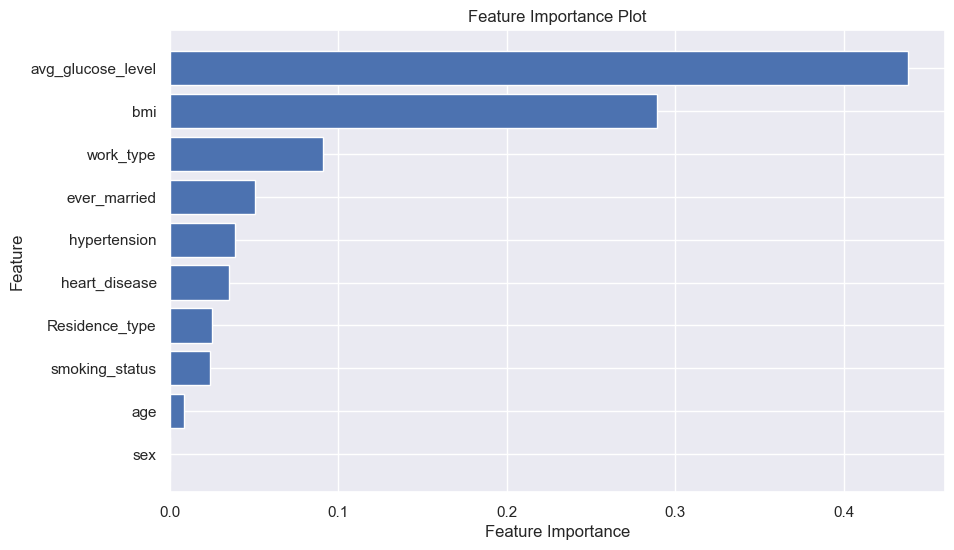

In [17]:
importance = best_tree_classifier.feature_importances_

# Sort feature importance
sorted_idx = np.argsort(importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance[sorted_idx], align='center')
plt.yticks(range(len(importance)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

AUC curve

In [ ]:
y_pred_prob = random_search.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)


cm = confusion_matrix(y_test,y_test_pred)
labels = [1,0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

10 fold cross validation

In [30]:
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True)

accuracy_k_fold_dt = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train, y_train)):
    X_train_fold, X_valid_fold = X_train.iloc[train_idx], X_train.iloc[valid_idx]
    y_train_fold, y_valid_fold = y_train.iloc[train_idx], y_train.iloc[valid_idx]

    random_search.fit(X_train_fold, y_train_fold)
    # Fai previsioni sul set di validazione e calcola l'accuratezza
    y_valid_pred = random_search.predict(X_valid_fold)
    accuracy_k_fold_dt.append(accuracy_score(y_valid_fold, y_valid_pred))
    

accuracy_k_fold_dt

[0.9542857142857143,
 0.9514285714285714,
 0.9614285714285714,
 0.9371428571428572,
 0.9571428571428572,
 0.9585714285714285,
 0.97,
 0.9514285714285714,
 0.9342857142857143,
 0.9642857142857143]

HistGradiendBoosting training and predicion

In [15]:
X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'max_iter': randint(50, 500),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': randint(3, 10),
    'min_samples_leaf': randint(1, 20),
    'l2_regularization': [0.0, 0.1, 0.2, 0.3],
}

hgb_classifier = HistGradientBoostingClassifier()

random_search = RandomizedSearchCV(
    hgb_classifier,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='recall',
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

# Print the best score on training data
print("Best score on training data: ", random_search.best_score_)

# Get the best model
best_model = random_search.best_estimator_

# Predictions on training set
train_predictions = best_model.predict(X_train)

# Print classification report for training set
print("Classification Report on Training Set:")
print(classification_report(y_train, train_predictions))

# Predictions on test set
test_predictions = best_model.predict(X_test)

# Print classification report for test set
print("Classification Report on Test Set:")
print(classification_report(y_test, test_predictions))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'l2_regularization': 0.3, 'learning_rate': 0.2, 'max_depth': 8, 'max_iter': 346, 'min_samples_leaf': 6}
Best score on training data:  1.0
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3463
           1       1.00      1.00      1.00      3537

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1537
           1       0.98      1.00      0.99      1463

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



AUC curve

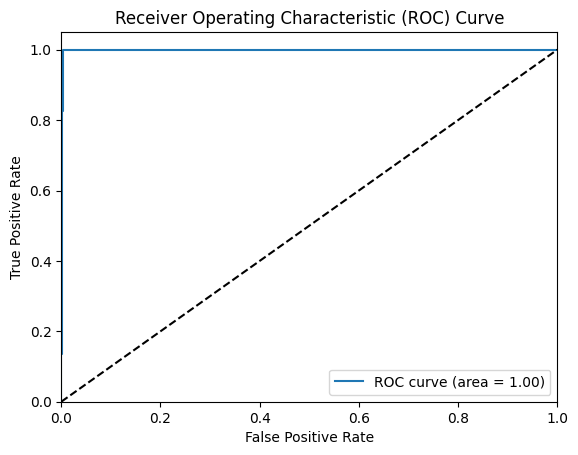

AUC Score: 0.99857468833259


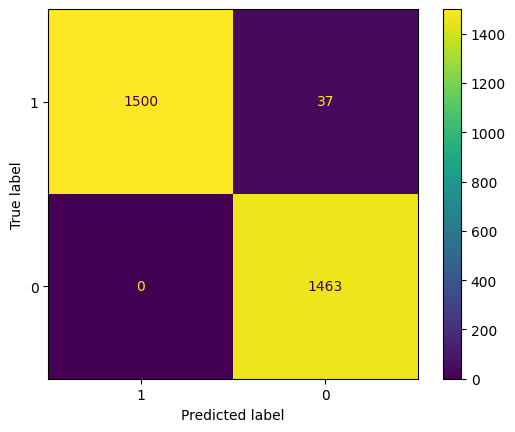

In [17]:
y_pred_prob = random_search.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)


cm = confusion_matrix(y_test,test_predictions)
labels = [1,0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

visualization of feature importances for hgb

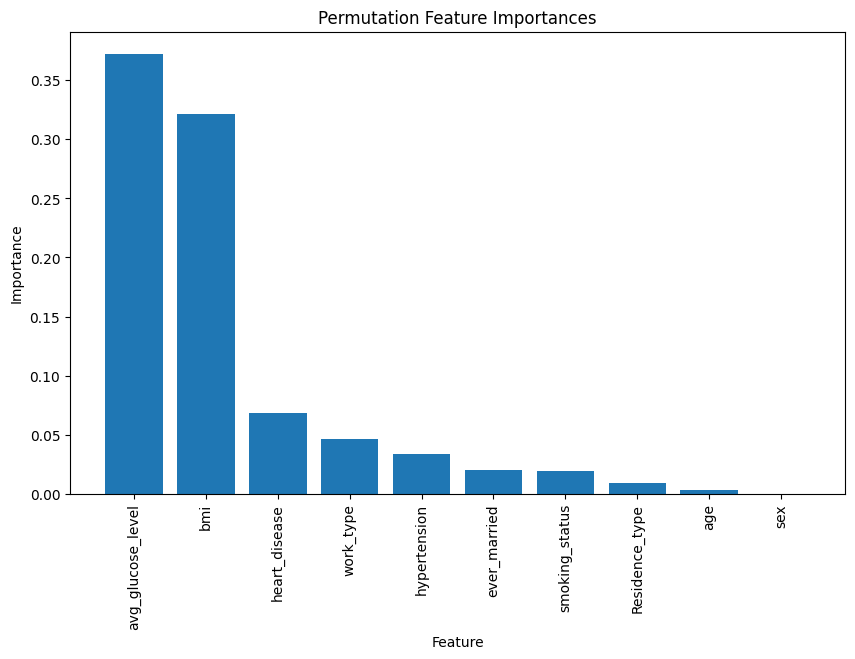

In [26]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42)

# Get feature names
feature_names = list(X_train.columns)

# Sort feature importances in descending order
sorted_indices = perm_importance.importances_mean.argsort()[::-1]

# Plot permutation feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(perm_importance.importances_mean)), perm_importance.importances_mean[sorted_indices], align='center')
plt.xticks(range(len(perm_importance.importances_mean)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Permutation Feature Importances')
plt.show()

Leaarning curve of HGB

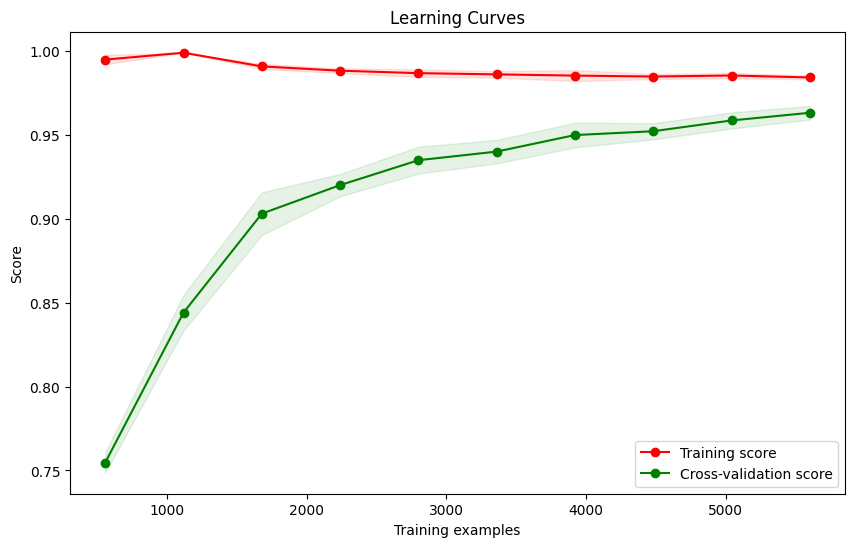

In [9]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    HistGradientBoostingClassifier(), X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curves")
plt.show()


100 fold cross validation

In [10]:
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True)

accuracy_k_fold_dt = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train, y_train)):
    X_train_fold, X_valid_fold = X_train.iloc[train_idx], X_train.iloc[valid_idx]
    y_train_fold, y_valid_fold = y_train.iloc[train_idx], y_train.iloc[valid_idx]

    best_model.fit(X_train_fold, y_train_fold)
    # Fai previsioni sul set di validazione e calcola l'accuratezza
    y_valid_pred = random_search.predict(X_valid_fold)
    accuracy_k_fold_dt.append(accuracy_score(y_valid_fold, y_valid_pred))
    

accuracy_k_fold_dt

[0.9871428571428571,
 0.9757142857142858,
 0.9614285714285714,
 0.98,
 0.9828571428571429,
 0.98,
 0.9771428571428571,
 0.9757142857142858,
 0.9714285714285714,
 0.97]

hgb confidence interval

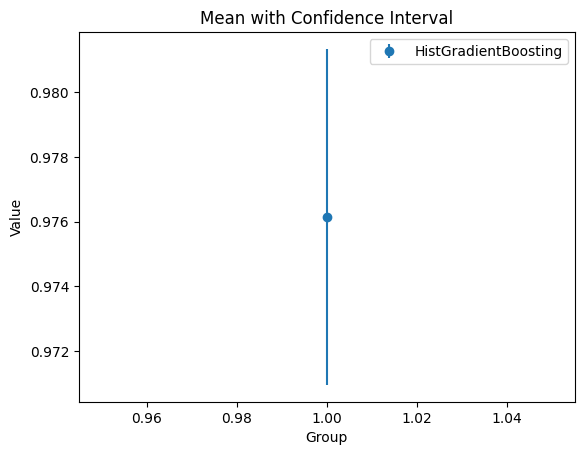

In [12]:
import scipy.stats as st
confidence_interval_dt = st.t.interval(confidence=0.95, df=len(accuracy_k_fold_dt)-1, loc=np.mean(accuracy_k_fold_dt), scale=st.sem(accuracy_k_fold_dt))
confidence_interval_dt
# Calculate mean and confidence interval on k-fold
mean_accuracy_dt = np.mean(accuracy_k_fold_dt)
# Plot the mean and confidence interval
plt.errorbar(1, mean_accuracy_dt, yerr=(confidence_interval_dt[1] - confidence_interval_dt[0])/2, fmt='o', label='HistGradientBoosting')
# Add labels and title
plt.xlabel('Group')
plt.ylabel('Value')
plt.title('Mean with Confidence Interval')
# Show the plot
plt.legend()
plt.show()